In [31]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from statsmodels.robust.scale import mad


In [32]:
first_df = pd.read_csv("../Results/First_results.csv").drop(columns=["X"])
second_df = pd.read_csv("../Results/Second_results.csv")
# Group by 'Data' to get the mean values for each dataset
first_df_avg = first_df.drop(columns=["Experiment","First","Second","Third"])
second_df_avg = second_df.drop(columns=["Experiment","First","Second","Third"])
first_df_avg = first_df_avg.groupby('Data').mean()
second_df_avg = second_df_avg.groupby('Data').mean()
first_df_avg["Dim"] = first_df_avg["n"]/first_df_avg["p"]
second_df_avg["Dim"] = second_df_avg["n"]/second_df_avg["p"]

In [33]:
# Function to make splits for boxplots or other plots
def split_df(df, name, column, value, low = "Low", high = "High"):
    df_below = df[df[column] < value].copy()
    df_above = df[df[column] >= value].copy()
    df_below["Group"] = low
    df_above["Group"] = high
    df_below["Exp"] = name
    df_above["Exp"] = name
    return df_below, df_above

# Remove outliers for plot
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[df[column] <= upper_bound]
    num_outliers = (df[column] > upper_bound).sum()
    return df_no_outliers, num_outliers

def r2_split_df(df,name, below,above, low = "Low", high = "High"):
    df_below = df[df.index.get_level_values("Data").isin(below)].copy()
    df_above = df[df.index.get_level_values("Data").isin(above)].copy()
    df_below["Group"] = low
    df_above["Group"] = high
    df_below["Exp"] = name
    df_above["Exp"] = name
    return df_below, df_above

In [34]:
results_extended = pd.DataFrame(index=[
    "MAE_median", "MAE_max", "MAE_min", "MAE_mad",
    "RMSE_median", "RMSE_max", "RMSE_min", "RMSE_mad",
    "Corr_median", "Corr_max", "Corr_min", "Corr_mad",
    "R2_median", "R2_max", "R2_min", "R2_mad",
    "LML_median", "LML_max","LML_min","LML_mad"
], columns=["First","Second"])

for i, df in enumerate([first_df_avg, second_df_avg]):
    mae_vals = df["MAE"]
    rmse_vals = df["RMSE"]
    corr_vals = df["Correlation"]
    lml_vals = df["LMP"]
    r2_vals = df["R2"]

    mae = np.median(mae_vals)
    max_mae = np.max(mae_vals)
    min_mae = np.min(mae_vals)
    mad_mae = np.median(np.abs(mae_vals - mae))

    rmse = np.median(rmse_vals)
    max_rmse = np.max(rmse_vals)
    min_rmse = np.min(rmse_vals)
    mad_rmse = np.median(np.abs(rmse_vals - rmse))

    corr = np.median(corr_vals)
    max_corr = np.max(corr_vals)
    min_corr = np.min(corr_vals)
    mad_corr = np.median(np.abs(corr_vals - corr))

    lml = np.median(lml_vals)
    max_lml = np.max(lml_vals)
    min_lml = np.min(lml_vals)
    mad_lml = np.median(np.abs(lml_vals - lml))

    r2 = np.median(r2_vals)
    max_r2 = np.max(r2_vals)
    min_r2 = np.min(r2_vals)
    mad_r2 = np.median(np.abs(r2_vals - r2))

    results_extended[results_extended.columns[i]] = [
        mae, max_mae, min_mae, mad_mae,
        rmse, max_rmse, min_rmse, mad_rmse,
        corr, max_corr, min_corr, mad_corr,
        r2, max_r2, min_r2, mad_r2,
        lml, max_lml, min_lml, mad_lml
    ]

results_extended

,First,Second
MAE_median,7.190151e-02,7.232445e-02
MAE_max,7.777284e-01,4.484676e+01
MAE_min,1.898544e-16,1.084669e-16
MAE_mad,2.963267e-02,2.903405e-02
RMSE_median,1.016646e-01,1.067693e-01
RMSE_max,3.643930e+00,5.010372e+02
RMSE_min,6.781447e-16,3.574539e-16
RMSE_mad,4.824580e-02,4.604656e-02
Corr_median,8.538219e-01,8.395480e-01
Corr_max,1.000000e+00,1.000000e+00


In [35]:
# Fix plots

sns.set(style="whitegrid")

# Update matplotlib settings to use LaTeX font
#plt.rcParams.update({
#    "text.usetex": False,  # Disable full LaTeX rendering
#    "font.family": "serif",  # Set the font family to serif
#    "font.serif": ["Times New Roman"]  # Use Times New Roman for the serif font
#})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

(108, 18) (20, 18)
(108, 18) (20, 18)


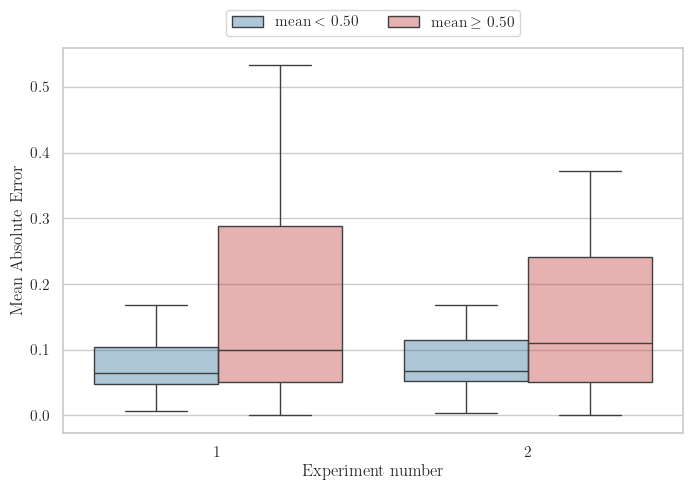

In [36]:
# Define split settings
split_column = "Mean_CORR"
split_value = 0.50
dfs = []
names = [1, 2]
for i, df in enumerate([first_df_avg, second_df_avg]):
    below, above = split_df(df, names[i], split_column, split_value, r'$\textnormal{mean} < 0.50$',r'$\textnormal{mean} \geq 0.50$')
    print(below.shape,above.shape)
    dfs.extend([below, above])

# Combine all
df_all = pd.concat(dfs)

# Define color mapping based on "Group" values

color_palette = ["#1f77b4", "#d62728"]  # Blue and Red colors with 20% opacity
# Create boxplot
f = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_all, x="Exp", y="MAE", hue = "Group", palette=color_palette, 
                 fliersize=6,     
                 linewidth=1,   
                 patch_artist=True,
                 showfliers=False)
for patch in ax.patches:
    patch.set_facecolor((patch.get_facecolor()[0], patch.get_facecolor()[1], patch.get_facecolor()[2], 0.4))  # Adjust alpha (0.4 is transparency)

#Labels 
plt.xlabel("Experiment number")
plt.ylabel("Mean Absolute Error")

# Adjusting the legend to have transparent boxes (20% opacity)
legend = ax.get_legend()

# Adjust the handles in the legend (boxes) to be transparent
for handle in legend.legend_handles:
    handle.set_alpha(0.2) 
plt.legend(loc='upper center', ncol=2, borderaxespad=-2.5, handlelength=2)

#f.savefig("mean_corr_split_05.pdf", transparent=True, bbox_inches='tight')
plt.show()

(63, 18) (65, 18)
(63, 18) (65, 18)


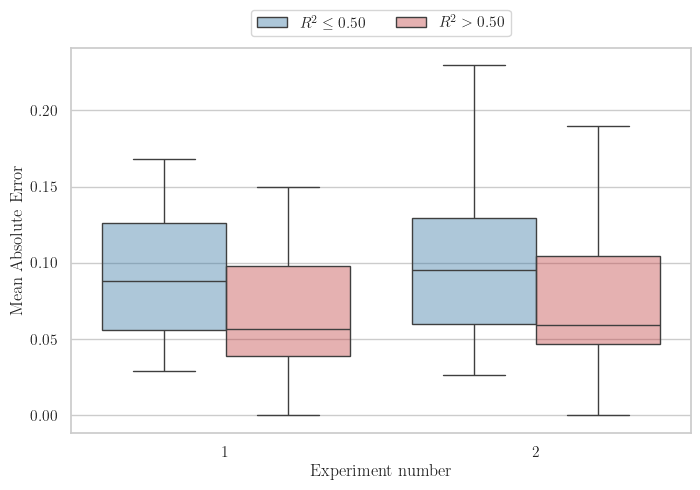

In [37]:
# R2 based on treshold 0.5 Linear regression model
above_r2_lm = ['_deprecated_195_auto_price', '_deprecated_207_autoPrice', '1027_ESL', '1029_LEV', '1089_USCrime', '1096_FacultySalaries', '192_vineyard', '197_cpu_act', '210_cloud', '227_cpu_small', '228_elusage', '229_pwLinear', '230_machine_cpu', '294_satellite_image', '4544_GeographicalOriginalofMusic', '485_analcatdata_vehicle', '503_wind', '505_tecator', '519_vinnie', '523_analcatdata_neavote', '527_analcatdata_election2000', '529_pollen', '542_pollution', '547_no2', '560_bodyfat', '561_cpu', '562_cpu_small', '573_cpu_act', '579_fri_c0_250_5', '590_fri_c0_1000_50', '595_fri_c0_1000_10', '598_fri_c0_1000_25', '603_fri_c0_250_50', '609_fri_c0_1000_5', '621_fri_c0_100_10', '624_fri_c0_100_5', '633_fri_c0_500_25', '635_fri_c0_250_10', '648_fri_c1_250_50', '649_fri_c0_500_5', '650_fri_c0_500_50', '651_fri_c0_100_25', '653_fri_c0_250_25', '654_fri_c0_500_10', '659_sleuth_ex1714', '663_rabe_266', '666_rmftsa_ladata', '687_sleuth_ex1605', '690_visualizing_galaxy', '695_chatfield_4', '706_sleuth_case1202', '712_chscase_geyser1', 'auto_insurance_price', 'first_principles_ideal_gas', 'first_principles_rydberg', 'nikuradse_1', 'strogatz_bacres1', 'strogatz_bacres2', 'strogatz_barmag1', 'strogatz_glider2', 'strogatz_lv1', 'strogatz_lv2', 'strogatz_predprey2', 'strogatz_vdp2', 'auto_insurance_losses']
all_datasets = first_df_avg.index.get_level_values("Data").unique()

# Filter to get the datasets that are NOT in the excluded list
below_r2_lm = [name for name in all_datasets if name not in above_r2_lm]

dfs = []
names = [1, 2]
for i, df in enumerate([first_df_avg, second_df_avg]):
    below, above = r2_split_df(df, names[i], below_r2_lm, above_r2_lm,r'$R^2 \leq 0.50$',r'$R^2 > 0.50$')
    print(below.shape,above.shape)
    dfs.extend([below, above])

# Combine all
df_all = pd.concat(dfs)

# Define color mapping based on "Group" values

color_palette = ["#1f77b4", "#d62728"]  # Blue and Red colors with 20% opacity
# Create boxplot
f = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_all, x="Exp", y="MAE", hue = "Group", palette=color_palette, 
                 fliersize=6,     
                 linewidth=1,   
                 patch_artist=True,
                 showfliers=False)
for patch in ax.patches:
    patch.set_facecolor((patch.get_facecolor()[0], patch.get_facecolor()[1], patch.get_facecolor()[2], 0.4))  # Adjust alpha (0.4 is transparency)

#Labels 
plt.xlabel("Experiment number")
plt.ylabel("Mean Absolute Error")

# Adjusting the legend to have transparent boxes (20% opacity)
legend = ax.get_legend()

# Adjust the handles in the legend (boxes) to be transparent
for handle in legend.legend_handles:
    handle.set_alpha(0.2) 
plt.legend(loc='upper center', ncol=2, borderaxespad=-2.5, handlelength=2)

#f.savefig("linearR2_split_05.pdf", transparent=True, bbox_inches='tight')
plt.show()

(61, 18) (67, 18)
(61, 18) (67, 18)


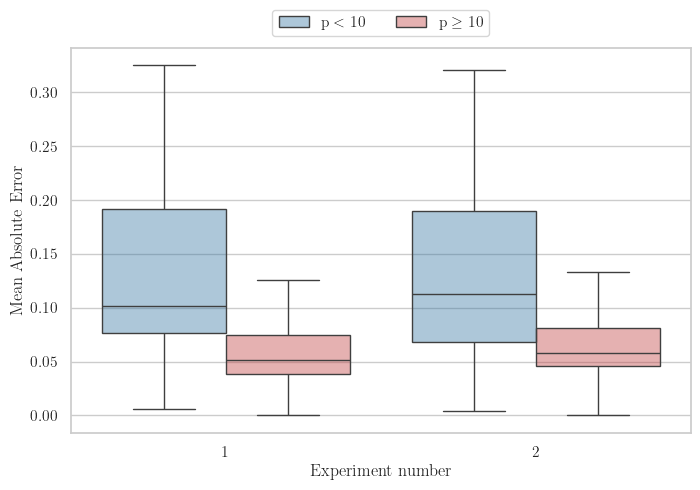

In [38]:
# Define split settings
split_column = "p"
split_value = 10
dfs = []
names = [1, 2]
for i, df in enumerate([first_df_avg, second_df_avg]):
    below, above = split_df(df, names[i], split_column, split_value, r'$\textnormal{p} < 10$',r'$\textnormal{p} \geq 10$')
    print(below.shape,above.shape)
    dfs.extend([below, above])

# Combine all
df_all = pd.concat(dfs)

# Define color mapping based on "Group" values

color_palette = ["#1f77b4", "#d62728"]  # Blue and Red colors with 20% opacity
# Create boxplot
f = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_all, x="Exp", y="MAE", hue = "Group", palette=color_palette, 
                 fliersize=6,     
                 linewidth=1,   
                 patch_artist=True,
                 showfliers=False)
for patch in ax.patches:
    patch.set_facecolor((patch.get_facecolor()[0], patch.get_facecolor()[1], patch.get_facecolor()[2], 0.4))  # Adjust alpha (0.4 is transparency)

#Labels 
plt.xlabel("Experiment number")
plt.ylabel("Mean Absolute Error")

# Adjusting the legend to have transparent boxes (20% opacity)
legend = ax.get_legend()

# Adjust the handles in the legend (boxes) to be transparent
for handle in legend.legend_handles:
    handle.set_alpha(0.2) 

plt.legend(loc='upper center', ncol=2, borderaxespad=-2.5, handlelength=2)
#f.savefig("p_split_10.pdf", transparent=True, bbox_inches='tight')
plt.show()

(45, 18) (83, 18)
(45, 18) (83, 18)


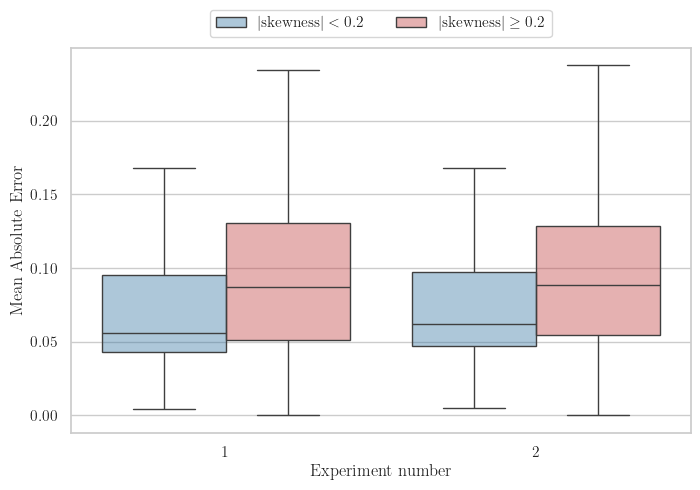

In [39]:
#SKEWNESS based on treshold abs(skew) < 0.2
low_skew = ['1027_ESL', '1028_SWD', '1029_LEV', '225_puma8NH', '519_vinnie', '523_analcatdata_neavote', '529_pollen', '542_pollution', '560_bodyfat', '579_fri_c0_250_5', '586_fri_c3_1000_25', '588_fri_c4_1000_100', '590_fri_c0_1000_50', '591_fri_c1_100_10', '592_fri_c4_1000_25', '595_fri_c0_1000_10', '598_fri_c0_1000_25', '602_fri_c3_250_10', '603_fri_c0_250_50', '607_fri_c4_1000_50', '608_fri_c3_1000_10', '609_fri_c0_1000_5', '615_fri_c4_250_10', '616_fri_c4_500_50', '617_fri_c3_500_5', '618_fri_c3_1000_50', '623_fri_c4_1000_10', '624_fri_c0_100_5', '633_fri_c0_500_25', '635_fri_c0_250_10', '644_fri_c4_250_25', '645_fri_c3_500_50', '646_fri_c3_500_10', '649_fri_c0_500_5', '650_fri_c0_500_50', '651_fri_c0_100_25', '653_fri_c0_250_25', '654_fri_c0_500_10', '663_rabe_266', '690_visualizing_galaxy', 'first_principles_newton', 'nikuradse_1', 'strogatz_bacres2', 'strogatz_glider1', 'strogatz_shearflow2']
# Filter to get the datasets that are NOT in the excluded list
high_skew = [name for name in all_datasets if name not in low_skew]

dfs = []
names = [1, 2]
for i, df in enumerate([first_df_avg, second_df_avg]):
    below, above = r2_split_df(df, names[i], low_skew, high_skew, r'$|\textnormal{skewness}| < 0.2$',r'$|\textnormal{skewness}| \geq 0.2$')
    print(below.shape,above.shape)
    dfs.extend([below, above])

# Combine all
df_all = pd.concat(dfs)

# Define color mapping based on "Group" values

color_palette = ["#1f77b4", "#d62728"]  # Blue and Red colors with 20% opacity
# Create boxplot
f = plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_all, x="Exp", y="MAE", hue = "Group", palette=color_palette, 
                 fliersize=6,     
                 linewidth=1,   
                 patch_artist=True,
                 showfliers=False)
for patch in ax.patches:
    patch.set_facecolor((patch.get_facecolor()[0], patch.get_facecolor()[1], patch.get_facecolor()[2], 0.4))  # Adjust alpha (0.4 is transparency)

#Labels 
plt.xlabel("Experiment number")
plt.ylabel("Mean Absolute Error")

# Adjusting the legend to have transparent boxes (20% opacity)
legend = ax.get_legend()

# Adjust the handles in the legend (boxes) to be transparent
for handle in legend.legend_handles:
    handle.set_alpha(0.2) 
plt.legend(loc='upper center', ncol=2, borderaxespad=-2.5, handlelength=2)
#f.savefig("skewness_split_02.pdf", transparent=True, bbox_inches='tight')
plt.show()
